## 1-Importing Libraries

In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer   
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


## 2- Getting Data

In [4]:
messages=[line.rstrip() for line in open('SMSSpamCollection')]

In [5]:
print(len(messages))

5574


In [2]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','message'])

In [3]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 3- EDA and Visualization

In [4]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
messages['length']=messages['message'].apply(lambda x: len(x))

In [7]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Text(0, 0.5, 'Frequency')

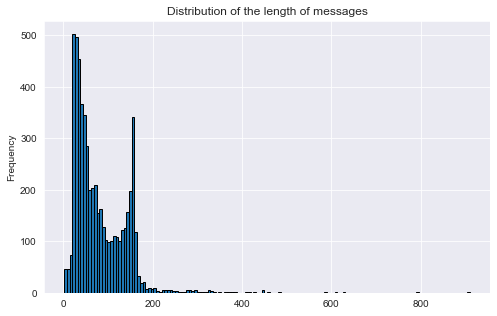

In [8]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
plt.hist(x='length', bins=150, data=messages,edgecolor='black')
plt.title('Distribution of the length of messages')
plt.ylabel('Frequency')

In [9]:
messages['length'].max()

910

In [10]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [11]:
messages[messages['length']==910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

Text(0, 0.5, '')

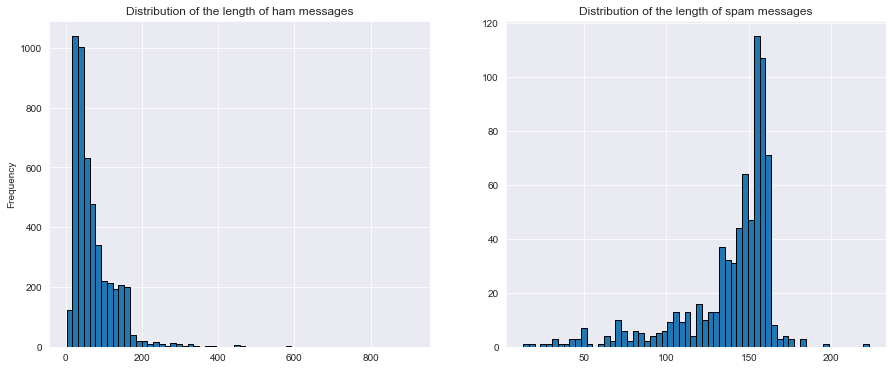

In [12]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.hist(x='length', bins=60, data=messages[messages['label']=='ham'],edgecolor='black')
plt.title('Distribution of the length of ham messages')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(x='length', bins=60, data=messages[messages['label']=='spam'],edgecolor='black')
plt.title('Distribution of the length of spam messages')
plt.ylabel('')

## 4-Text Pre-processing

###### 4-1- Removing punctuation

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

###### 4-2- Removing stopwords

In [15]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

###### 4-3- Processing function

In [16]:
messages['message'].apply(lambda y: [x for x in ("".join([x for x in y if x not in string.punctuation])).split() if x.lower() not in stopwords.words('english')])

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [17]:
def my_func(y):
    return [x for x in ("".join([x for x in y if x not in string.punctuation])).split() if x.lower() not in stopwords.words('english')]

## 5- Vectorization

###### 5-1- Counting (Term Frequency)

In [19]:
cv=CountVectorizer(analyzer=my_func)

In [20]:
cv.fit(messages['message'])

CountVectorizer(analyzer=<function my_func at 0x000001F3CABFF048>, binary=False,
                decode_error='strict', dtype=<class 'numpy.int64'>,
                encoding='utf-8', input='content', lowercase=True, max_df=1.0,
                max_features=None, min_df=1, ngram_range=(1, 1),
                preprocessor=None, stop_words=None, strip_accents=None,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None,
                vocabulary=None)

In [21]:
print(len(cv.vocabulary_))

11425


In [22]:
#testing

mes4=messages['message'].iloc[3]

In [23]:
print(mes4)

U dun say so early hor... U c already then say...


In [24]:
bow4=cv.transform([mes4])

In [25]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [26]:
cv.get_feature_names()[4068]

'U'

In [27]:
cv.get_feature_names()[9554]

'say'

In [28]:
bow=cv.transform(messages['message'])

In [29]:
print('Shape of Sparse Matrix :',bow.shape)

Shape of Sparse Matrix : (5572, 11425)


In [30]:
bow.nnz

50548

In [31]:
sparsity = (100.0 * bow.nnz / (bow.shape[0] * bow.shape[1]))
print('sparsity: {}'.format( (sparsity)))

sparsity: 0.07940295412668218


###### 5-2- Term weigh (Inverse Document Frequency)

In [33]:
tfidf=TfidfTransformer()

In [34]:
tfidf.fit(bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [35]:
#testing

tfidf4=tfidf.transform(bow4)

In [38]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [36]:
TFIDF=tfidf.transform(bow)

In [37]:
TFIDF.shape

(5572, 11425)

###### 5-3- Training a model

In [39]:
mnnb=MultinomialNB()  

In [40]:
mnnb.fit(TFIDF,messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
#testing

mnnb.predict(tfidf4)

array(['ham'], dtype='<U4')

In [43]:
mnnb.predict(tfidf4)[0]

'ham'

In [44]:
messages['label'][3]

'ham'

In [45]:
prediction=mnnb.predict(TFIDF)

In [46]:
prediction

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

## 6- Train Test Split

In [47]:
X=messages['message']
y=messages['label']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 7- Creating a Data Pipeline

We will use SciKit Learn's pipeline capabilities instead of Vectorization step.

In [50]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=my_func)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [51]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function my_func at 0x000001F3CABFF048>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [52]:
predictions=pipeline.predict(X_test)

## 8- Model Evaluation

In [53]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       980
        spam       1.00      0.73      0.84       135

    accuracy                           0.97      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.97      0.97      0.96      1115



The accuracy of our model is 97% which is perfect for text data.